# **Group Porject** - FUNDAMENTALS OF INTERPRETABLE DATA SCIENCE

**Group Members:**

Anais Mellas
Bharanidharan Murugesan
Praveen Subramani
Anto Sibi Rayan Arivazhagan

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
import lime
import lime.lime_tabular
from lime import lime_text
from lime.lime_text import LimeTextExplainer

# **Data Exploration**

In [ ]:
data = pd.read_csv(r"churn_2024.csv")

In [ ]:
data.head()

number_customer_service_calls  number_customer_service_interactions  \
0                              2                                     3   
1                              2                                     2   
2                              2                                     2   
3                              2                                     2   
4                              1                                     3   

         state  regional_economy  international_plan  total_intl_calls  \
0  Mississippi           138.740                 0.0               0.0   
1      Vermont            40.617                 0.0               1.0   
2     Michigan           620.696                 1.0               8.0   
3     Kentucky           260.304                 1.0               1.0   
4        Texas          2355.960                 0.0               0.0   

   voice_mail_plan  number_vmail_messages  account_length  last_renewal  \
0              0.0                    0.0        5.333333      0.533333   
1              1.0                    2.0        3.000000      0.800000   
2              1.0                    0.0       42.000000     11.900000   
3              0.0                    2.0       39.000000      2.600000   
4              1.0                    1.0        9.000000      0.750000   

   discount  total_usage  number_service_outage  service_outage_reported  \
0    0.1201     0.355556                      0                      0.0   
1    0.1867     0.100000                      0                      0.0   
2    0.1809     4.900000                      3                      3.0   
3    0.0726     6.500000                     14                     14.0   
4    0.1915     2.550000                      4                      4.0   

   ad_spend  wifi_bundle  phone_bundle  churn  
0    7.3414          1.0           0.0      0  
1    7.0964          1.0           0.0      0  
2    9.4712          0.0           0.0      1  
3   13.1440          0.0           0.0      1  
4    9.3815          1.0           1.0      0

In [ ]:
# to check missing values
data.isnull().sum()

number_customer_service_calls           0
number_customer_service_interactions    0
state                                   0
regional_economy                        0
international_plan                      0
total_intl_calls                        0
voice_mail_plan                         0
number_vmail_messages                   0
account_length                          0
last_renewal                            0
discount                                0
total_usage                             0
number_service_outage                   0
service_outage_reported                 0
ad_spend                                0
wifi_bundle                             0
phone_bundle                            0
churn                                   0
dtype: int64

In [ ]:
# count of each unique value in the 'state' column
state_counts = data['state'].value_counts()

# Computing percentages
total_records = len(data)
state_percentages = (state_counts / total_records) * 100

print("Unique values and their counts in the 'state' column (percentages):")
print(state_percentages)

Unique values and their counts in the 'state' column (percentages):
state
Alabama           2.31
Wyoming           2.28
West Virginia     2.16
Maine             2.15
Oklahoma          2.15
Hawaii            2.15
Delaware          2.15
Oregon            2.11
Iowa              2.10
Nebraska          2.08
Nevada            2.07
Alaska            2.07
Michigan          2.07
North Carolina    2.06
Illinois          2.06
Pennsylvania      2.05
New Hampshire     2.05
South Carolina    2.05
South Dakota      2.04
Texas             2.04
Kentucky          2.04
Maryland          2.03
Washington        2.03
Tennessee         2.03
New Jersey        2.00
Ohio              1.99
New York          1.99
Arkansas          1.99
Louisiana         1.98
New Mexico        1.98
Rhode Island      1.97
Connecticut       1.96
Virginia          1.95
Mississippi       1.94
Missouri          1.94
Colorado          1.93
Montana           1.92
Florida           1.92
Indiana           1.91
Massachusetts     1.91
North 

In [ ]:
# checking distribution of target variable
data['churn'].value_counts()

churn
0    6389
1    3611
Name: count, dtype: int64

In [ ]:
# Defining geographical regions
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania']
midwest = ['Ohio', 'Indiana', 'Illinois', 'Michigan', 'Wisconsin', 'Minnesota', 'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas']
south = ['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Texas', 'Oklahoma']
west = ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 'California', 'Oregon', 'Washington', 'Alaska', 'Hawaii']

# Grouping states based on geographical regions
grouped_states = {
    'Northeast': [state for state in northeast if state in state_percentages.index],
    'Midwest': [state for state in midwest if state in state_percentages.index],
    'South': [state for state in south if state in state_percentages.index],
    'West': [state for state in west if state in state_percentages.index]
}

print("Grouped states based on geographical regions:")
for region, states in grouped_states.items():
    print(region + ":", states)

Grouped states based on geographical regions:
Northeast: ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania']
Midwest: ['Ohio', 'Indiana', 'Illinois', 'Michigan', 'Wisconsin', 'Minnesota', 'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas']
South: ['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Texas', 'Oklahoma']
West: ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 'California', 'Oregon', 'Washington', 'Alaska', 'Hawaii']


# **Data Preprocessing**

In [ ]:
# Defining geographical regions
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania']
midwest = ['Ohio', 'Indiana', 'Illinois', 'Michigan', 'Wisconsin', 'Minnesota', 'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas']
south = ['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Texas', 'Oklahoma']
west = ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 'California', 'Oregon', 'Washington', 'Alaska', 'Hawaii']

# Function to assign regions
def assign_region(state):
    if state in northeast:
        return 'Region_Northeast'
    elif state in midwest:
        return 'Region_Midwest'
    elif state in south:
        return 'Region_South'
    elif state in west:
        return 'Region_West'
    else:
        return 'Region_Other'

# Creating 'region' column
data['region'] = data['state'].apply(assign_region)

In [ ]:
# count of each unique value in the 'region' column
state_counts = data['region'].value_counts()

# Computing percentages
total_records = len(data)
state_percentages = (state_counts / total_records) * 100

print("Unique values and their counts in the 'state' column (percentages):")
print(state_percentages)

Unique values and their counts in the 'state' column (percentages):
region
Region_South        32.70
Region_West         25.79
Region_Midwest      23.65
Region_Northeast    17.86
Name: count, dtype: float64


In [ ]:
# Creating dummy variables for 'region' column
region_dummies = pd.get_dummies(data['region'])

# Converting True/False to 0s and 1s
region_dummies = region_dummies.astype(int)

# Concatenate dummy variables with original DataFrame
data = pd.concat([data, region_dummies], axis=1)

In [ ]:
data.drop(columns=['region','state'], inplace=True)

In [ ]:
data.head()

number_customer_service_calls  number_customer_service_interactions  \
0                              2                                     3   
1                              2                                     2   
2                              2                                     2   
3                              2                                     2   
4                              1                                     3   

   regional_economy  international_plan  total_intl_calls  voice_mail_plan  \
0           138.740                 0.0               0.0              0.0   
1            40.617                 0.0               1.0              1.0   
2           620.696                 1.0               8.0              1.0   
3           260.304                 1.0               1.0              0.0   
4          2355.960                 0.0               0.0              1.0   

   number_vmail_messages  account_length  last_renewal  discount  ...  \
0                    0.0        5.333333      0.533333    0.1201  ...   
1                    2.0        3.000000      0.800000    0.1867  ...   
2                    0.0       42.000000     11.900000    0.1809  ...   
3                    2.0       39.000000      2.600000    0.0726  ...   
4                    1.0        9.000000      0.750000    0.1915  ...   

   number_service_outage  service_outage_reported  ad_spend  wifi_bundle  \
0                      0                      0.0    7.3414          1.0   
1                      0                      0.0    7.0964          1.0   
2                      3                      3.0    9.4712          0.0   
3                     14                     14.0   13.1440          0.0   
4                      4                      4.0    9.3815          1.0   

   phone_bundle  churn  Region_Midwest  Region_Northeast  Region_South  \
0           0.0      0               0                 0             1   
1           0.0      0               0                 1             0   
2           0.0      1               1                 0             0   
3           0.0      1               0                 0             1   
4           1.0      0               0                 0             1   

   Region_West  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 21 columns]

In [ ]:
X=data.drop("churn",axis=1)
y=data["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Features Selection**

In [ ]:
# Create SelectKBest instance with f_classif
selector = SelectKBest(score_func=f_classif, k='all')

# Fit selector to X_train and y_train
selector.fit(X_train, y_train)

# Get F-scores and corresponding feature names
f_scores = selector.scores_
feature_names = X_train.columns

# Sort the F-scores and feature names in descending order
sorted_indices = np.argsort(f_scores)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]

# Select the top 15 variables based on the F-scores
top_15_features = sorted_features[:15]

# Print the top 15 variables based on the F-scores
print("Top 15 Variables based on F-score:")
for feature in top_15_features:
    print(feature)

Top 15 Variables based on F-score:
account_length
total_usage
service_outage_reported
number_service_outage
last_renewal
ad_spend
wifi_bundle
discount
total_intl_calls
number_customer_service_interactions
number_customer_service_calls
phone_bundle
Region_South
international_plan
Region_West


# **Correlation Matrix**

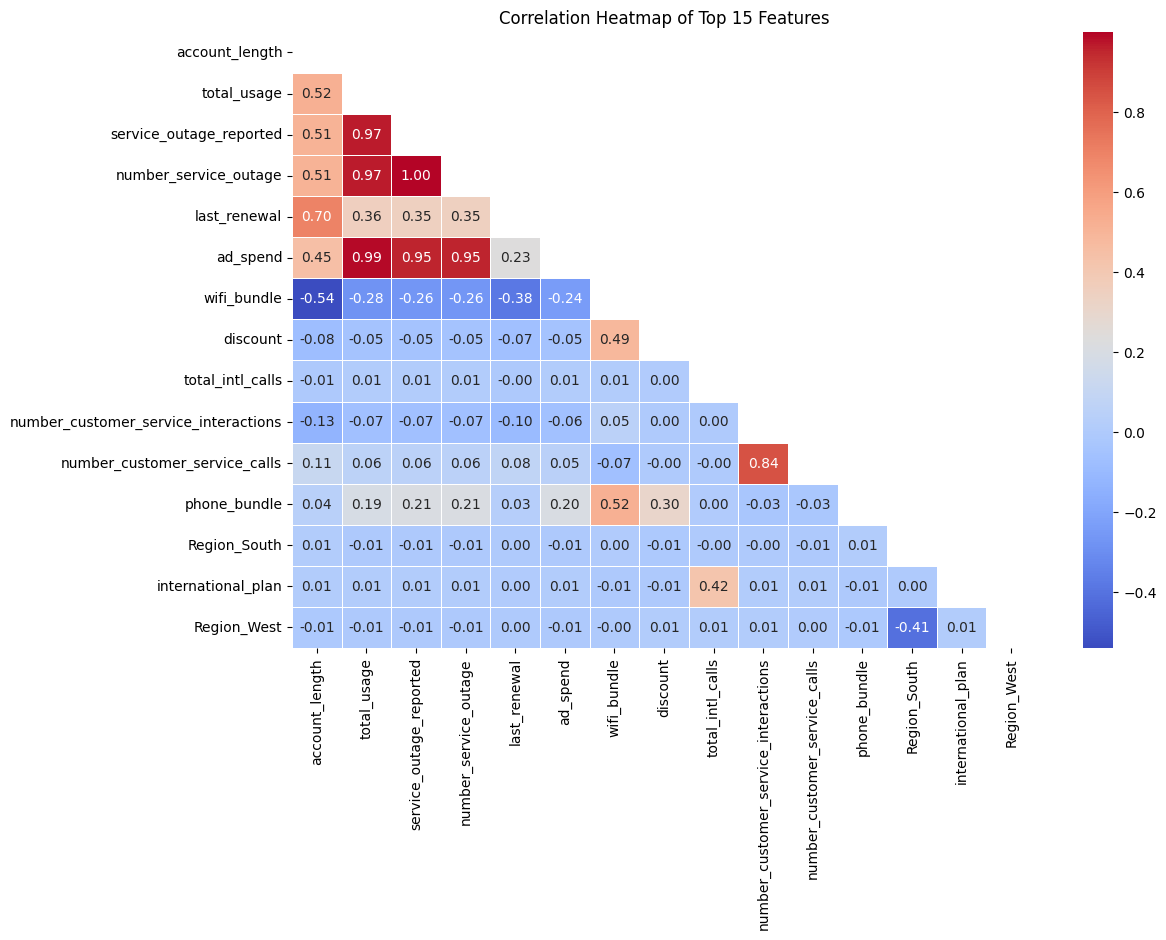

In [ ]:
data_subset = data[top_15_features]
# Calculate correlation matrix
correlation_matrix = data_subset.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Create a mask for upper triangle
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5 , mask=mask)
plt.title('Correlation Heatmap of Top 15 Features')
plt.show()

In [ ]:
# Feature ingineering to avoid multicolinearity
data['no_customer_service_calls_interactions'] = (data['number_customer_service_calls'] + data['number_customer_service_interactions']) / 2
data['ad_spend_per_day_of_usage'] = data['ad_spend'] / data['total_usage']
data = data.drop(columns=['number_customer_service_calls', 'number_customer_service_interactions','ad_spend','total_usage','service_outage_reported'])

In [ ]:
data.isnull().sum()

regional_economy                          0
international_plan                        0
total_intl_calls                          0
voice_mail_plan                           0
number_vmail_messages                     0
account_length                            0
last_renewal                              0
discount                                  0
number_service_outage                     0
wifi_bundle                               0
phone_bundle                              0
churn                                     0
Region_Midwest                            0
Region_Northeast                          0
Region_South                              0
Region_West                               0
no_customer_service_calls_interactions    0
ad_spend_per_day_of_usage                 0
dtype: int64

In [ ]:
# Check for infinity values in the entire dataset
is_inf = data.replace([np.inf, -np.inf], np.nan).isna().sum()

# Get columns with infinity values
columns_with_inf = is_inf[is_inf > 0].index.tolist()

# Count number of infinity values in each column
num_inf_per_column = data[columns_with_inf].replace([np.inf, -np.inf], np.nan).isna().sum()

# Display results
print("Columns with Infinity Values:")
print(columns_with_inf)
print("\nNumber of Infinity Values per Column:")
print(num_inf_per_column)

Columns with Infinity Values:
['ad_spend_per_day_of_usage']

Number of Infinity Values per Column:
ad_spend_per_day_of_usage    94
dtype: int64


In [ ]:
# Replace infinity and large values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the mean of each column
data.fillna(data.mean(), inplace=True)

In [ ]:
# Separate features and target variable
X = data.drop("churn", axis=1)
y = data["churn"]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create SelectKBest instance with f_classif
selector = SelectKBest(score_func=f_classif, k='all')

# Perform feature selection
selector.fit(X_train, y_train)

# Get F-scores and corresponding feature names
f_scores = selector.scores_
feature_names = X_train.columns

# Sort the F-scores and feature names in descending order
sorted_indices = np.argsort(f_scores)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]

# Select the top 15 variables based on the F-scores
top_15_features = sorted_features[:15]

# Print the top 15 variables based on the F-scores
print("Top 15 Variables based on F-score:")
for feature in top_15_features:
    print(feature)

Top 15 Variables based on F-score:
account_length
number_service_outage
last_renewal
wifi_bundle
discount
ad_spend_per_day_of_usage
total_intl_calls
phone_bundle
Region_South
international_plan
Region_West
Region_Northeast
number_vmail_messages
no_customer_service_calls_interactions
regional_economy


# **Correlation Matrix 2.0**

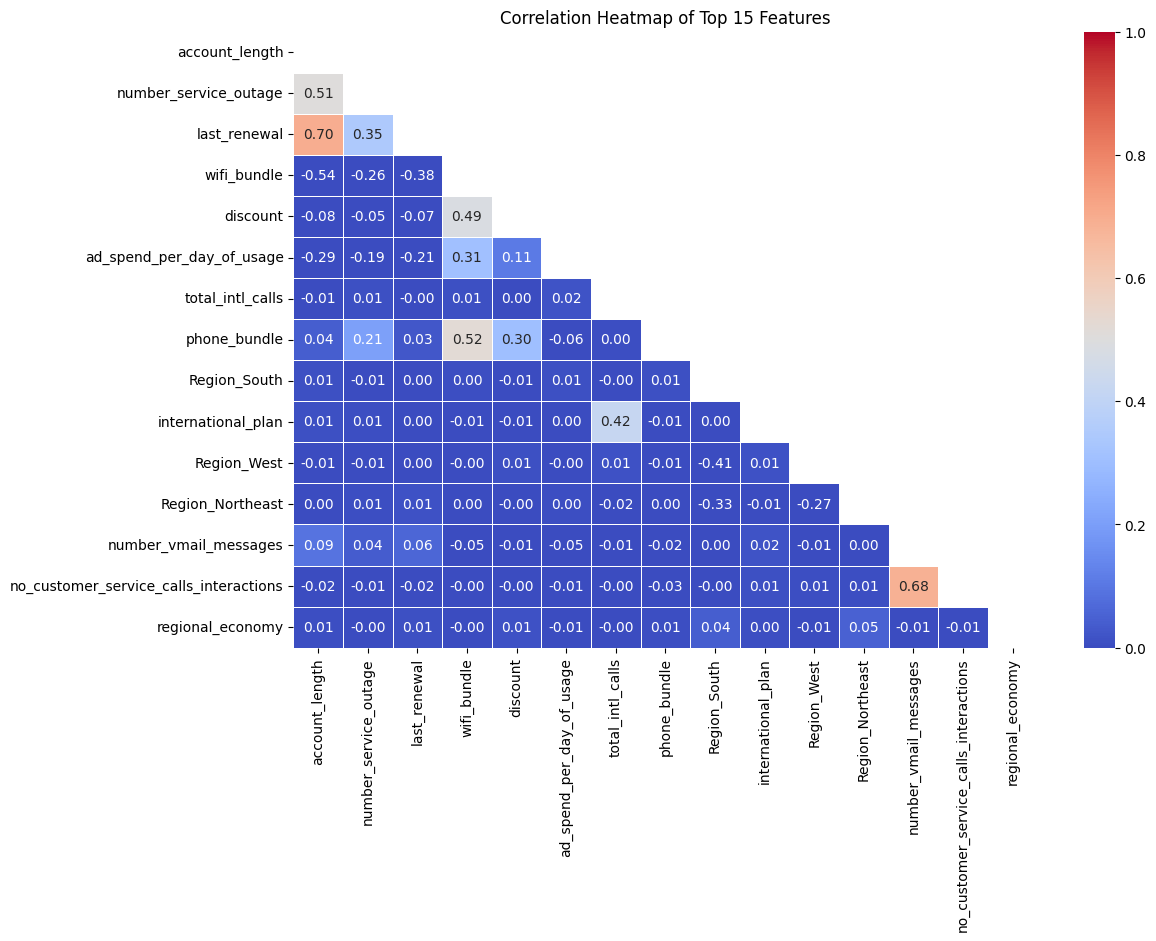

In [ ]:
data_subset = data[top_15_features]

# Calculate correlation matrix
correlation_matrix = data_subset.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Create a mask for upper triangle
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask, vmin=0, vmax=1)
plt.title('Correlation Heatmap of Top 15 Features')
plt.show()

In [ ]:
data_subset = pd.concat([data_subset, data['churn']], axis=1)

In [ ]:
X = data_subset.drop("churn", axis=1)
y = data_subset["churn"]

In [ ]:

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(data_subset.drop('churn', axis=1), data_subset['churn'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # Split the remaining data into train and validation sets (0.25 * 0.8 = 0.2)

# Initialize classifiers
logistic_reg = LogisticRegression(max_iter=10000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()
xgb = XGBClassifier()

classifiers = {
    "Logistic Regression": logistic_reg,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "SVM": svm,
    "KNN": knn,
    "XGB": xgb
}

# Train the models and evaluate
results = []
for model_name, model in classifiers.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    val_pred = model.predict(X_val)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    val_acc = accuracy_score(y_val, val_pred)
    train_auc = roc_auc_score(y_train, train_pred)
    test_auc = roc_auc_score(y_test, test_pred)
    val_auc = roc_auc_score(y_val, val_pred)
    train_precision = precision_score(y_train, train_pred)
    test_precision = precision_score(y_test, test_pred)
    val_precision = precision_score(y_val, val_pred)
    train_recall = recall_score(y_train, train_pred)
    test_recall = recall_score(y_test, test_pred)
    val_recall = recall_score(y_val, val_pred)
    results.append([model_name, "Train", train_acc, train_auc, train_precision, train_recall])
    results.append(["", "Test", test_acc, test_auc, test_precision, test_recall])
    results.append(["", "Validation", val_acc, val_auc, val_precision, val_recall])

# Create a table
table = PrettyTable()
table.field_names = ["Model", "Dataset", "Accuracy", "AUC", "Precision", "Recall"]

# Add results to the table
for row in results:
    table.add_row(row)

# Print the table
print(table)

+---------------------+------------+--------------------+--------------------+--------------------+----------------------+
|        Model        |  Dataset   |      Accuracy      |        AUC         |     Precision      |        Recall        |
+---------------------+------------+--------------------+--------------------+--------------------+----------------------+
| Logistic Regression |   Train    | 0.7018333333333333 | 0.6270320138520687 | 0.6554338668913227 | 0.36051899907321594  |
|                     |    Test    |       0.6905       | 0.6184801537550856 | 0.6512820512820513 |  0.344640434192673   |
|                     | Validation |        0.71        | 0.6388381280565272 | 0.6619047619047619 |  0.388268156424581   |
|    Decision Tree    |   Train    |        1.0         |        1.0         |        1.0         |         1.0          |
|                     |    Test    |       0.6425       | 0.6200314557637208 | 0.5143603133159269 |  0.5345997286295794  |
|               

Logistic regression performs best among the highly interpretable models

## **HyperParameter Tuning - Logistic Regression**

In [ ]:
# Split the data_subset into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(data_subset.drop('churn', axis=1), data_subset['churn'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # Split the remaining data into train and validation sets (0.25 * 0.8 = 0.2)


Best parameters: {'C': 10, 'penalty': 'l1'}
Validation accuracy with best parameters: 0.709
Test accuracy with best parameters: 0.6915


In [ ]:

# Initialize Logistic Regression classifier
logistic = LogisticRegression(max_iter=1000)

# Initialize RFE selector
rfe = RFE(estimator=logistic)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Create pipeline with feature scaling, feature selector, and classifier
pipeline = Pipeline([
    ('scaling', scaler),
    ('feature_selection', rfe),
    ('classification', logistic)
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'feature_selection__n_features_to_select': [15,20],  # Number of features to select
    'classification__solver': ['liblinear', 'saga'],  # Solver for logistic regression
    'classification__C': [0.01, 0.1, 0.4, 0.8, 0.3],  # Regularization parameter
    'classification__penalty': ['l1', 'l2'],  # Penalty parameter
    'classification__class_weight': ['balanced']  # Class weights
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and feature selector
best_model = grid_search.best_estimator_
feature_selector = grid_search.best_estimator_.named_steps['feature_selection']

# Function to calculate performance metrics
def calculate_metrics(model, X, y):
    predictions = model.predict(X)
    probabilities = model.predict_proba(X)[:, 1]
    accuracy = accuracy_score(y, predictions)
    auc = roc_auc_score(y, probabilities)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    return accuracy, auc, precision, recall

# Calculate performance metrics for training data
train_accuracy, train_auc, train_precision, train_recall = calculate_metrics(best_model, X_train, y_train)

# Calculate performance metrics for validation data
val_accuracy, val_auc, val_precision, val_recall = calculate_metrics(best_model, X_val, y_val)

# Calculate performance metrics for test data
test_accuracy, test_auc, test_precision, test_recall = calculate_metrics(best_model, X_test, y_test)

In [ ]:
# Print the parameters of the best model
print("Best model parameters:")
print(grid_search.best_params_)

Best model parameters:
{'classification__C': 0.8, 'classification__class_weight': 'balanced', 'classification__penalty': 'l1', 'classification__solver': 'saga', 'feature_selection__n_features_to_select': 15}


In [ ]:
# Create a list to store the performance metrics
performance_data = []

# Add performance metrics for training data
performance_data.append({'Dataset': 'Training',
                         'Accuracy': train_accuracy,
                         'AUC': train_auc,
                         'Precision': train_precision,
                         'Recall': train_recall})

# Add performance metrics for validation data
performance_data.append({'Dataset': 'Validation',
                         'Accuracy': val_accuracy,
                         'AUC': val_auc,
                         'Precision': val_precision,
                         'Recall': val_recall})

# Add performance metrics for test data
performance_data.append({'Dataset': 'Test',
                         'Accuracy': test_accuracy,
                         'AUC': test_auc,
                         'Precision': test_precision,
                         'Recall': test_recall})

# Create DataFrame from the list of performance metrics
performance_table = pd.DataFrame(performance_data)

# Display the performance table
performance_table

Dataset  Accuracy       AUC  Precision    Recall
0    Training  0.662167  0.709824   0.526358  0.606117
1  Validation  0.665500  0.710103   0.527943  0.620112
2        Test  0.660000  0.707800   0.535316  0.586160

Recall and Precision are improtant matrices in a classification model and we can clearly see that their value increased comapring to the previous reuslts  

# **Interpretation - Logistic Regression**

In [ ]:
# Get the coefficients for the best logistic regression model
coefficients = best_model.named_steps['classification'].coef_

# If you want to get feature names corresponding to coefficients
selected_feature_indices = feature_selector.support_
selected_feature_names = X.columns[selected_feature_indices]

# Printing coefficients along with corresponding feature names
for feature, coef in zip(selected_feature_names, coefficients[0]):
    print(f"{feature}: {coef}")


account_length: 2.2849274271534252
number_service_outage: 2.3831942132933284
last_renewal: 0.0
wifi_bundle: -0.15772544896086513
discount: -1.282757664227596
ad_spend_per_day_of_usage: 0.0
total_intl_calls: -1.3699624323125341
phone_bundle: 0.34990407065698353
Region_South: 0.07193715955771002
international_plan: -0.01622192125917253
Region_West: -0.07837586009081844
Region_Northeast: -0.13409905643160974
number_vmail_messages: -0.13818393620141028
no_customer_service_calls_interactions: 0.0
regional_economy: 0.0


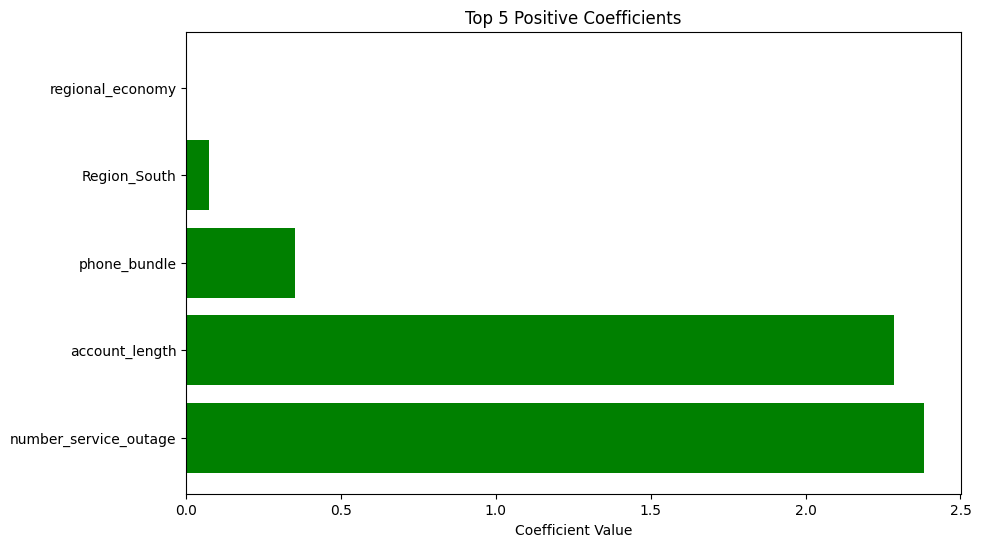

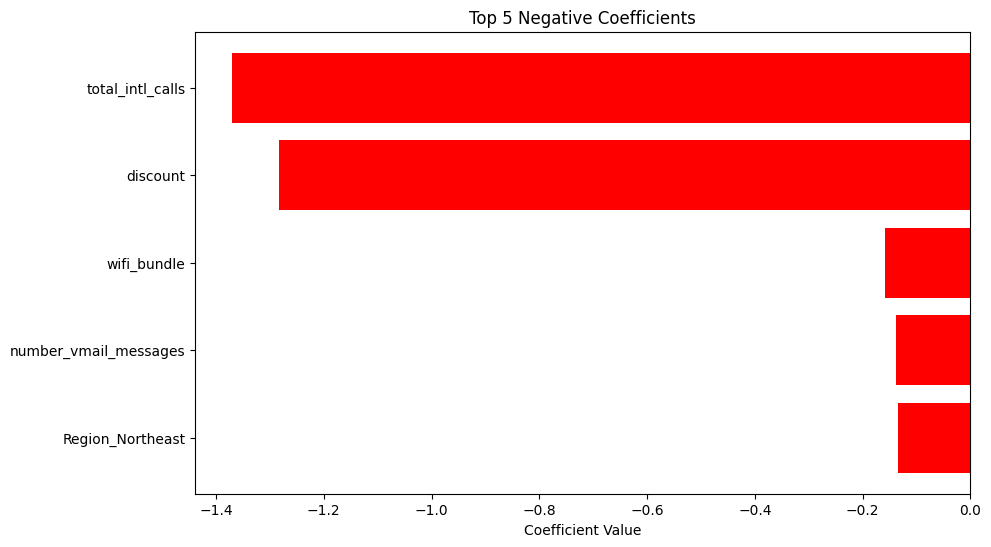

In [ ]:

# Extracting feature names and corresponding coefficients
feature_names = selected_feature_names
coefficients = coefficients[0]

# Sorting coefficients in ascending order
sorted_indices = coefficients.argsort()

# Top 5 positive coefficients
top_positive_indices = sorted_indices[-5:]
top_positive_features = [feature_names[i] for i in top_positive_indices]
top_positive_coeffs = [coefficients[i] for i in top_positive_indices]

# Top 5 negative coefficients
top_negative_indices = sorted_indices[:5]
top_negative_features = [feature_names[i] for i in top_negative_indices]
top_negative_coeffs = [coefficients[i] for i in top_negative_indices]

# Plotting top 5 positive coefficients
plt.figure(figsize=(10, 6))
plt.barh(top_positive_features, top_positive_coeffs, color='green')
plt.xlabel('Coefficient Value')
plt.title('Top 5 Positive Coefficients')
plt.gca().invert_yaxis()
plt.show()

# Plotting top 5 negative coefficients
plt.figure(figsize=(10, 6))
plt.barh(top_negative_features, top_negative_coeffs, color='red')
plt.xlabel('Coefficient Value')
plt.title('Top 5 Negative Coefficients')
plt.gca().invert_yaxis()
plt.show()


These coefficients provide insights into how each feature influences the likelihood of churn, helping in understanding the drivers of customer churn in the dataset. for exemple:

***account_length***: This coefficient (2.28) indicates that as the account length increases by one unit, the log odds of the target variable  being true (1) versus false (0) increases by approximately 2.28, assuming all other features remain constant.

***wifi_bundle:*** This coefficient (-0.16) suggests that having a WiFi bundle is associated with a slight decrease in the log odds of the target variable being true.


In [ ]:

# Get the intercept from the logistic regression model
intercept = best_model.named_steps['classification'].intercept_[0]

# Now you can apply the logistic function to the intercept
probability_intercept = logit_to_prob(intercept)

# Round the probability to three decimal places
probability_intercept_rounded = probability_intercept.round(3)

print("Intercept Probability:", probability_intercept_rounded)


Intercept Probability: 0.387


An intercept probability of 0.387 suggests that when all the input features are zero, the estimated probability of the target outcome (in this case, likely churn or not) is approximately 0.387.

In logistic regression, the intercept term represents the base probability of the event occurring when all predictor variables are zero or have no effect.In othe rterms , if a new observation with all features set to zero, the model estimates a 38.7% chance of the target outcome to be 0.

This information is valuable in understanding the baseline probability of the event and how much each feature contributes to increasing or decreasing this probability.

#**PDP**

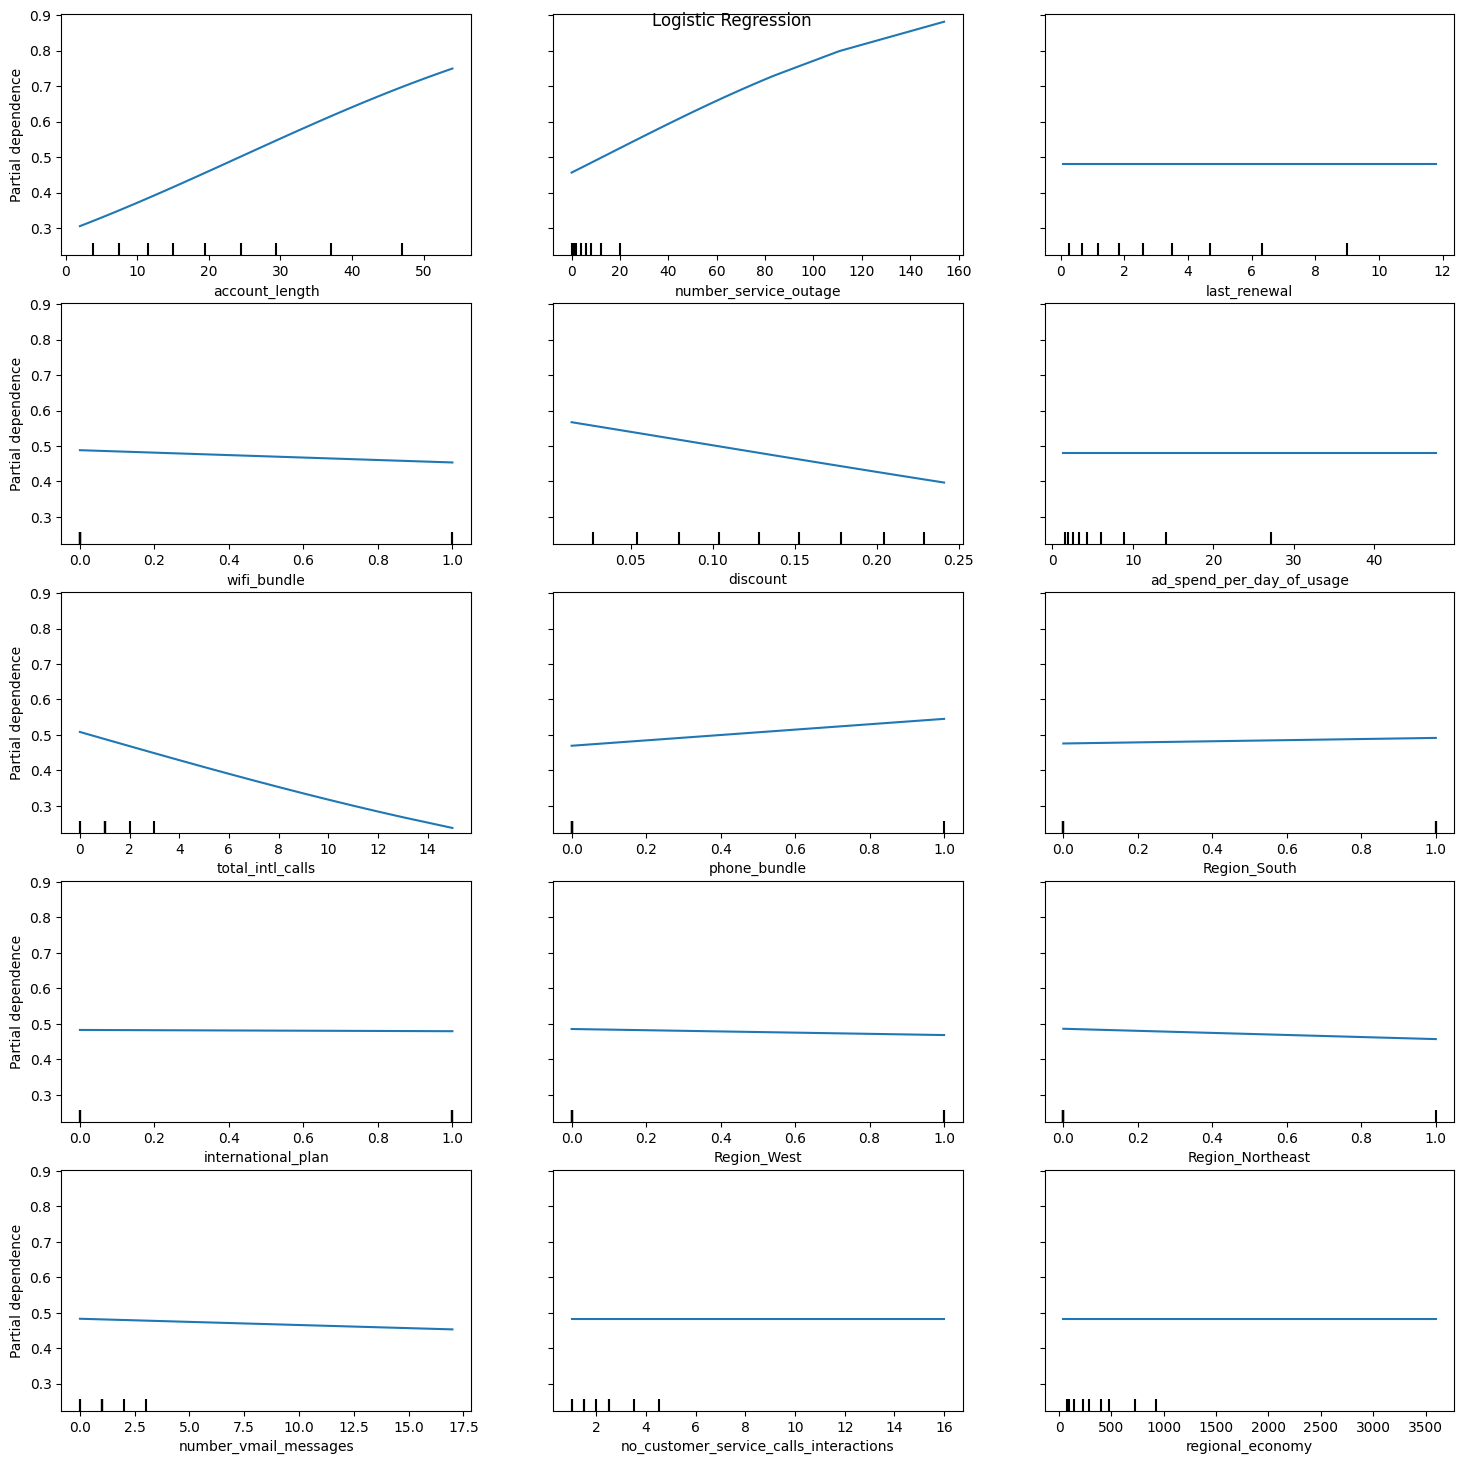

In [ ]:
# log reg with hyperparameters
from sklearn.inspection import PartialDependenceDisplay
# Plot Partial Dependence for logistic regression
fig, ax = plt.subplots(figsize=(15, 15))
PartialDependenceDisplay.from_estimator(
    estimator=best_model,
    X=X_train,
    features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    ax=ax
)
fig.tight_layout(pad=2.0)
fig.suptitle("Logistic Regression")
plt.show()



Each plot illustrates the relationship between a single predictor variable and the predicted outcome, while holding all other variables constant.

**Account Length:** The plot suggests a positive relationship between account length and the target variable. As account length increases, the probability of the target event occurring also increases.

**Number of Service Outages**: This plot also shows a positive relationship; more service outages seem to increase the likelihood of the target event. The plot shows a particularly steep increase, suggesting a strong influence of service outages on the target.

**Last Renewal**: This variable appears to have no significant relationship with the target, indicated by a flat line.

**WiFi Bundle**: Shows a flat line, suggesting no significant effect on the target outcome from whether a WiFi bundle is included or not.

**Discount**: The line slopes downwards slightly, indicating that higher discounts might slightly decrease the probability of the target event occurring.

**Total International Calls:** There is a negative relationship here; as the number of international calls increases, the likelihood of the target event occurring decreases.

**Phone Bundle**: Like with the WiFi bundle, this shows a flat line, indicating no significant impact on the target outcome.

These insights suggest that variables like account length and the number of service outages are influential in predicting the target event in this logistic regression model, whereas variables like last renewal, and the inclusion of bundles do not significantly affect the outcome.

# **2D Partial Plot**

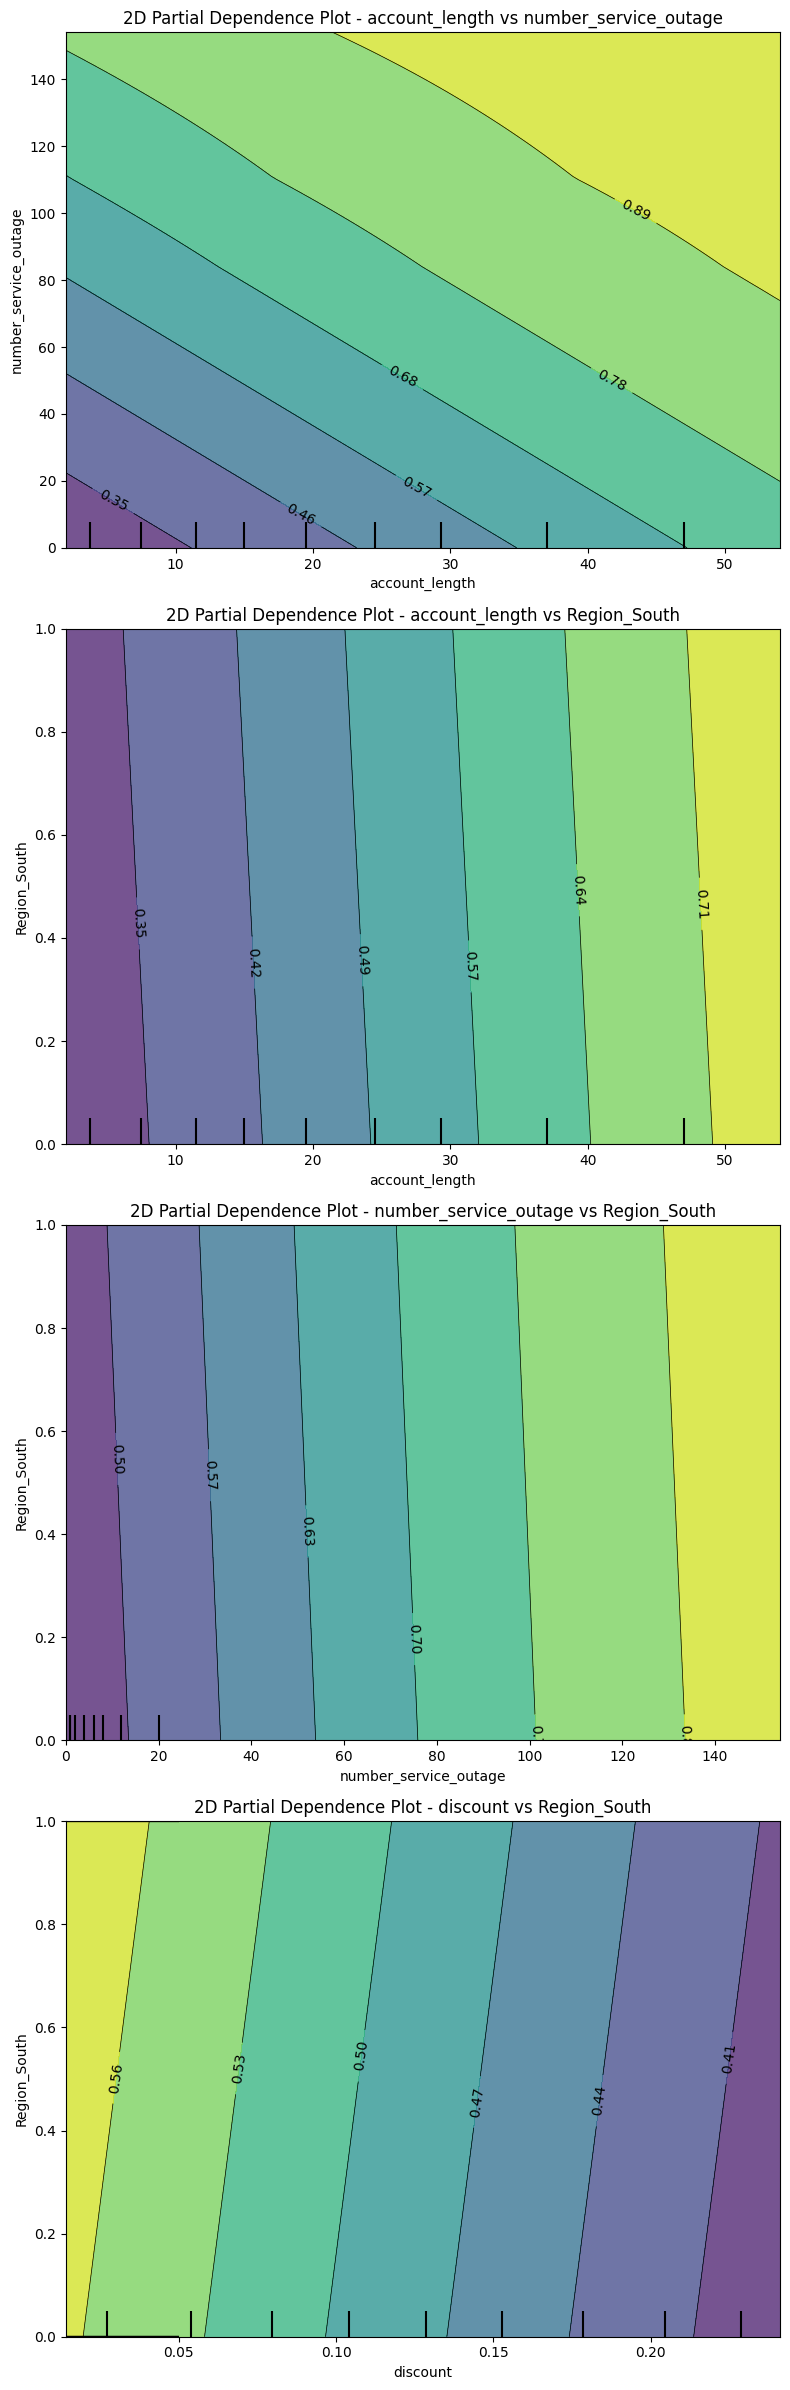

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Define the feature combinations for the 2D partial dependence plots
feature_combinations = [(0, 1), (0, 8), (1, 8), (4, 8)]  # Example feature indices

# Assume best_model, X_train, and feature_names are defined elsewhere in your code

# Plot the 2D partial dependence plots
fig, axs = plt.subplots(len(feature_combinations), figsize=(8, len(feature_combinations) * 6))

for i, feature_pair in enumerate(feature_combinations):
    disp = PartialDependenceDisplay.from_estimator(
        best_model, X_train, features=[feature_pair], feature_names=feature_names, ax=axs[i]
    )
    axs[i].set_title(f'2D Partial Dependence Plot - {feature_names[feature_pair[0]]} vs {feature_names[feature_pair[1]]}')
    axs[i].set_xlabel(feature_names[feature_pair[0]])
    axs[i].set_ylabel(feature_names[feature_pair[1]])

if len(feature_combinations) == 1:
    axs = [axs]

plt.tight_layout()
plt.show()


2D Partial Dependence Plot illustrates the relationship between two features. This type of plot is used to visualize how the expected response (the target variable) changes as a function of two input features in the model, averaged over the joint distribution of the other features in the dataset

**account_length -  number_service_outage** : There is a clear trend showing that as either account_length increases, the model's response increases, or as number_service_outage increases, the model's response also increases. The highest response values are observed when both features are at their highest values on the plot.The plot suggests a potential interaction effect between these two features, where their combined higher values have a stronger impact on increasing the model's response adn as we move to the right along the account_length or move up along the number_service_outage, the response value increases. The highest value shown in the plot is around 0.89 in the yellow region, which occurs at high values of both features.

**Region South vs. Account Length:**

Southern customers have a higher likelihood of a specific behavior (e.g., churn, purchase, etc.) as the account length increases. For example, if a customer is from the Southern region, the probability of this behavior is around 42% when the account length is 10 months. As the account length increases to 50 months, this probability significantly rises to about 71%.

**Region South vs. Number of Service Outages:**

Customers from the Southern region show an increasing probability of a specific behavior as the number of service outages increases. For instance, in the South, the probability of this behavior is approximately 40% when there are 10 service outages, climbing sharply to about 90% at 140 outages.

**Region South vs. Discount:**

Southern customers demonstrate a decrease in the likelihood of a specific behavior as discounts increase. This trend suggests that even though they are receiving higher discounts, their probability of the behavior is still higher than that of customers from other regions. For example, a Southern customer has a 56% probability of this behavior at a 5% discount, which decreases to 41% at a 20% discount.

Each graph demonstrates how the likelihood of being in the "South" region changes in relation to the changes in account characteristics. The variations across different features help in understanding which factors are more influential in predicting regional affiliation.



#**LIME**

## Logistic Regression with Hyperparameters tunning

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer

# Create a LimeTabularExplainer instance
explainer = LimeTabularExplainer(X_train.values,
                                 mode='classification',  # Specify mode as classification
                                 training_labels=y_train.values,  # Pass training labels
                                 feature_names=X_train.columns)  # Pass feature names

# Choose an instance for explanation
instance_idx = 18

# Explain the instance using LimeTabularExplainer
exp = explainer.explain_instance(X_test.iloc[instance_idx].values,  # Provide instance values to explain
                                  best_model.predict_proba,  # Pass a function that predicts probabilities
                                  num_features=len(X_train.columns))  # Specify the number of features to use

# Display explanation in a notebook with table
exp.show_in_notebook(show_table=True)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


The image provided showcases three distinct sections, each providing key insights into a predictive model's output regarding customer behavior, likely focusing on churn probability:

1. **Prediction Probabilities**:
   - The prediction probabilities indicate a 62% likelihood of the customer not churning (Class 0) and a 38% probability of churning (Class 1). This dual probability highlights the model's assessment based on the current customer data features.

2. **Decision Path**:
   - The middle section visually represents the decision-making process of the model through a decision path or tree structure. This path displays how different thresholds and conditions for various features determine the predicted outcome. For instance, the decision tree suggests that if the discount is greater than 0.19 and the account length is greater than 9.50, then the probability of churning (Class 1) is affected. Each line and node within the tree contributes to narrowing down the predictive outcome by evaluating factors such as phone bundles, regional affiliation, service outages, and more.

3. **Feature List and Values**:
   - The rightmost section lists the features and their respective values for the data instance being analyzed. It highlights features such as account length, type of service bundle, and the number of service outages, among others. This detailed list shows how each feature contributes to the model's final prediction. Features that may increase the likelihood of churn are emphasized differently, allowing for a clearer understanding of which factors are most influential in predicting churn. This section essentially quantifies the influence of each feature on the model's output, which can be crucial for targeted customer retention strategies.



In [ ]:
# Display Model prediction vs LIME prediction
pd.DataFrame(
    [exp.local_pred.item(), exp.predict_proba[1]],
    index=["LIME Prediction", "Model Prediction"],
    columns=["Probability"]
    )

Probability
LIME Prediction      0.249408
Model Prediction     0.258571

When contrasting the forecast from LIME with that of the model, we note that the probability estimated by LIME is slightly lower than the model's probability. Despite this, the instance can still be categorized as belonging to the churn class. Nevertheless, it's crucial to acknowledge that LIME's forecasts are approximations and might not precisely mirror those of the model. Additionally, it's pertinent to recognize that LIME offers localized interpretability, concentrating on individual observation, while the model's forecast encapsulates its general behavior. Consequently, the LIME forecast aids in uncovering the factors influencing the model's decision for a given observation.

# **SHAP**

In [135]:
import shap

explainer = shap.Explainer(logistic_reg, X_train)
shap_values = explainer.shap_values(X_test)

# choosing an instance to explain
instance_idx = 16
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[instance_idx], feature_names=X_train.columns)

NOTE : The SHAP force plot we are examining provides an explanation for a specific cutomers from test dataset, using a logistic regression model defiend earlier (not the tunned one).It a good start and helps in understanding why a model made a specific prediction for a single instance.

In [136]:
# Set up explainer for ".predict" method
explainer = shap.Explainer(best_model.predict, X_train)

# Compute shap values
shap_values = explainer(X_train)

PermutationExplainer explainer: 6001it [10:57,  8.96it/s]


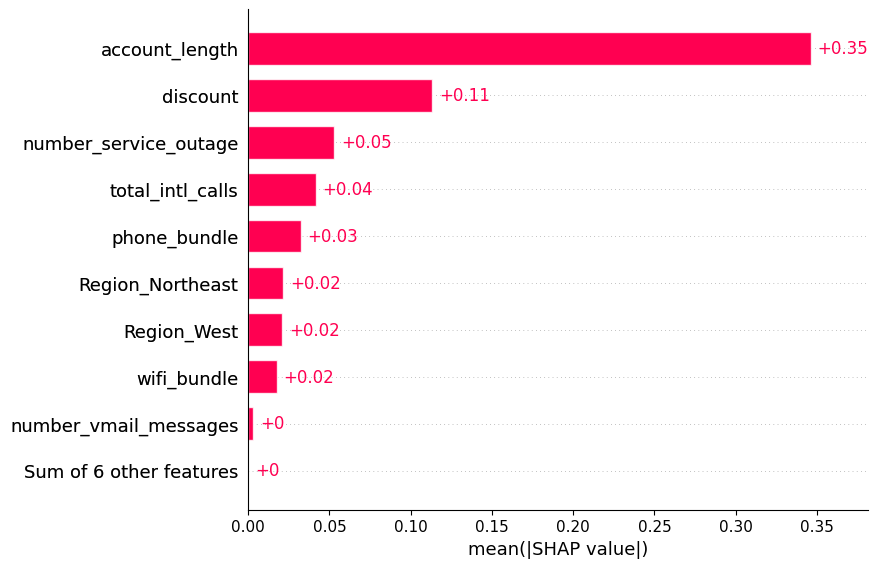

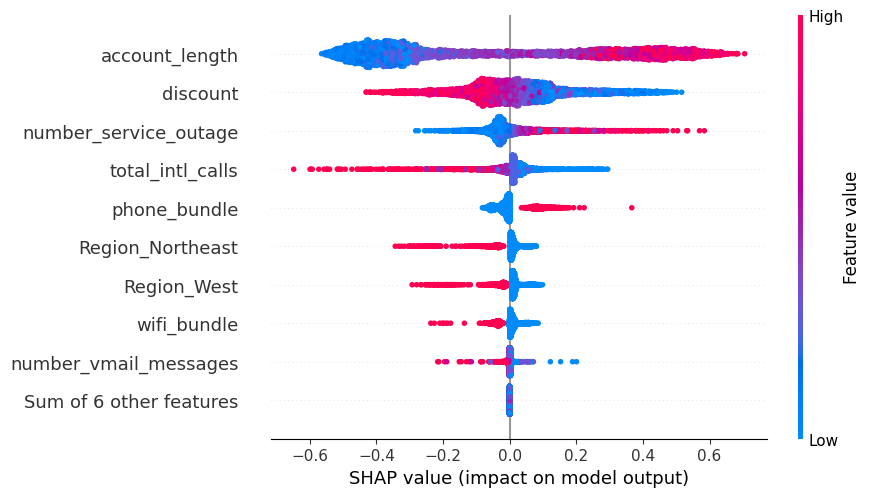

In [ ]:
# Feature importance (global)

# Bar chart
shap.plots.bar(shap_values)

# Individual dots for each instance
shap.plots.beeswarm(shap_values)


1. **Top Contributing Features**: The features that contribute most significantly to the model’s prediction are:
   - **Account Length**: The most influential feature, with a positive mean SHAP value. A longer account length typically increases the churn probability, suggesting that customers with older accounts might be more prone to leaving.
   - **Discount**: The second most influential feature. High discounts significantly reduce the likelihood of churn, indicating that customers who receive more discounts are less likely to churn.
   - **Number of Service Outages**: The third most impactful feature. More outages increase the likelihood of churn, as frequent disruptions in service can lead to customer dissatisfaction.

2. **Feature Impact and Values**:
   - **Total International Calls** and **Phone Bundle**: Both have moderate positive SHAP values, indicating these features also influence churn but to a lesser extent than account length or discounts.
   - **Region (Northeast and West)**: Slight positive influence on churn, suggesting regional factors might play a role in customer retention.
   - **WiFi Bundle**: Similar to the regional features, it has a modest impact on churn.

3. **Interpretation of SHAP Values**:
   - Red indicates a higher impact on predicting churn probability. Features shown in red, like account length and discounts, are crucial in understanding churn.
   - Blue indicates a lower impact. Features in blue, such as the number of voicemail messages, show negligible or no impact on churn probability in this model.

4. **Suggestions Based on Analysis**:
   - **Offering Discounts**: Continuously assessing and potentially increasing discounts can help reduce churn, as indicated by the high positive impact of the discount feature.
   - **Addressing Service Outages**: Improving service reliability could significantly reduce churn, given the negative impact of service outages on customer retention.
   - **Long-term Customer Strategies**: Developing specific strategies for long-term customers might be crucial since longer account lengths contribute to higher churn rates.

These insights can guide strategic decisions to enhance customer retention, emphasizing the importance of targeted interventions based on the characteristics that most significantly influence churn.

# **Top 25% of churners**

In [ ]:
# Top 25% of churners
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
threshold = np.percentile(y_pred_prob, 75)
top_25_churners = X_test[y_pred_prob >= threshold]

In [ ]:
top_25_churners.head()

account_length  number_service_outage  last_renewal  wifi_bundle  \
4684            51.0                     18     10.200000          0.0   
4521            58.0                     16      6.766667          0.0   
576             58.0                      5     11.600000          0.0   
6363            32.0                      3      1.600000          0.0   
9920            51.0                     42     13.600000          0.0   

      discount  ad_spend_per_day_of_usage  total_intl_calls  phone_bundle  \
4684    0.1913                   1.515947               1.0           0.0   
4521    0.0745                   1.751302               0.0           1.0   
576     0.2224                   2.635793               0.0           1.0   
6363    0.0709                   5.290125               0.0           0.0   
9920    0.0693                   1.223722               1.0           1.0   

      Region_South  international_plan  Region_West  Region_Northeast  \
4684             0                 1.0            0                 1   
4521             0                 0.0            0                 1   
576              0                 1.0            1                 0   
6363             0                 0.0            1                 0   
9920             0                 0.0            1                 0   

      number_vmail_messages  no_customer_service_calls_interactions  \
4684                    0.0                                     1.0   
4521                    2.0                                     4.0   
576                     1.0                                     1.0   
6363                    2.0                                     2.5   
9920                    1.0                                     2.0   

      regional_economy  
4684            40.617  
4521           923.089  
576             63.618  
6363          3598.103  
9920           248.176

In [118]:
feature_names

['account_length',
 'number_service_outage',
 'last_renewal',
 'wifi_bundle',
 'discount',
 'ad_spend_per_day_of_usage',
 'total_intl_calls',
 'phone_bundle',
 'Region_South',
 'international_plan',
 'Region_West',
 'Region_Northeast',
 'number_vmail_messages',
 'no_customer_service_calls_interactions',
 'regional_economy']

#**PDP**

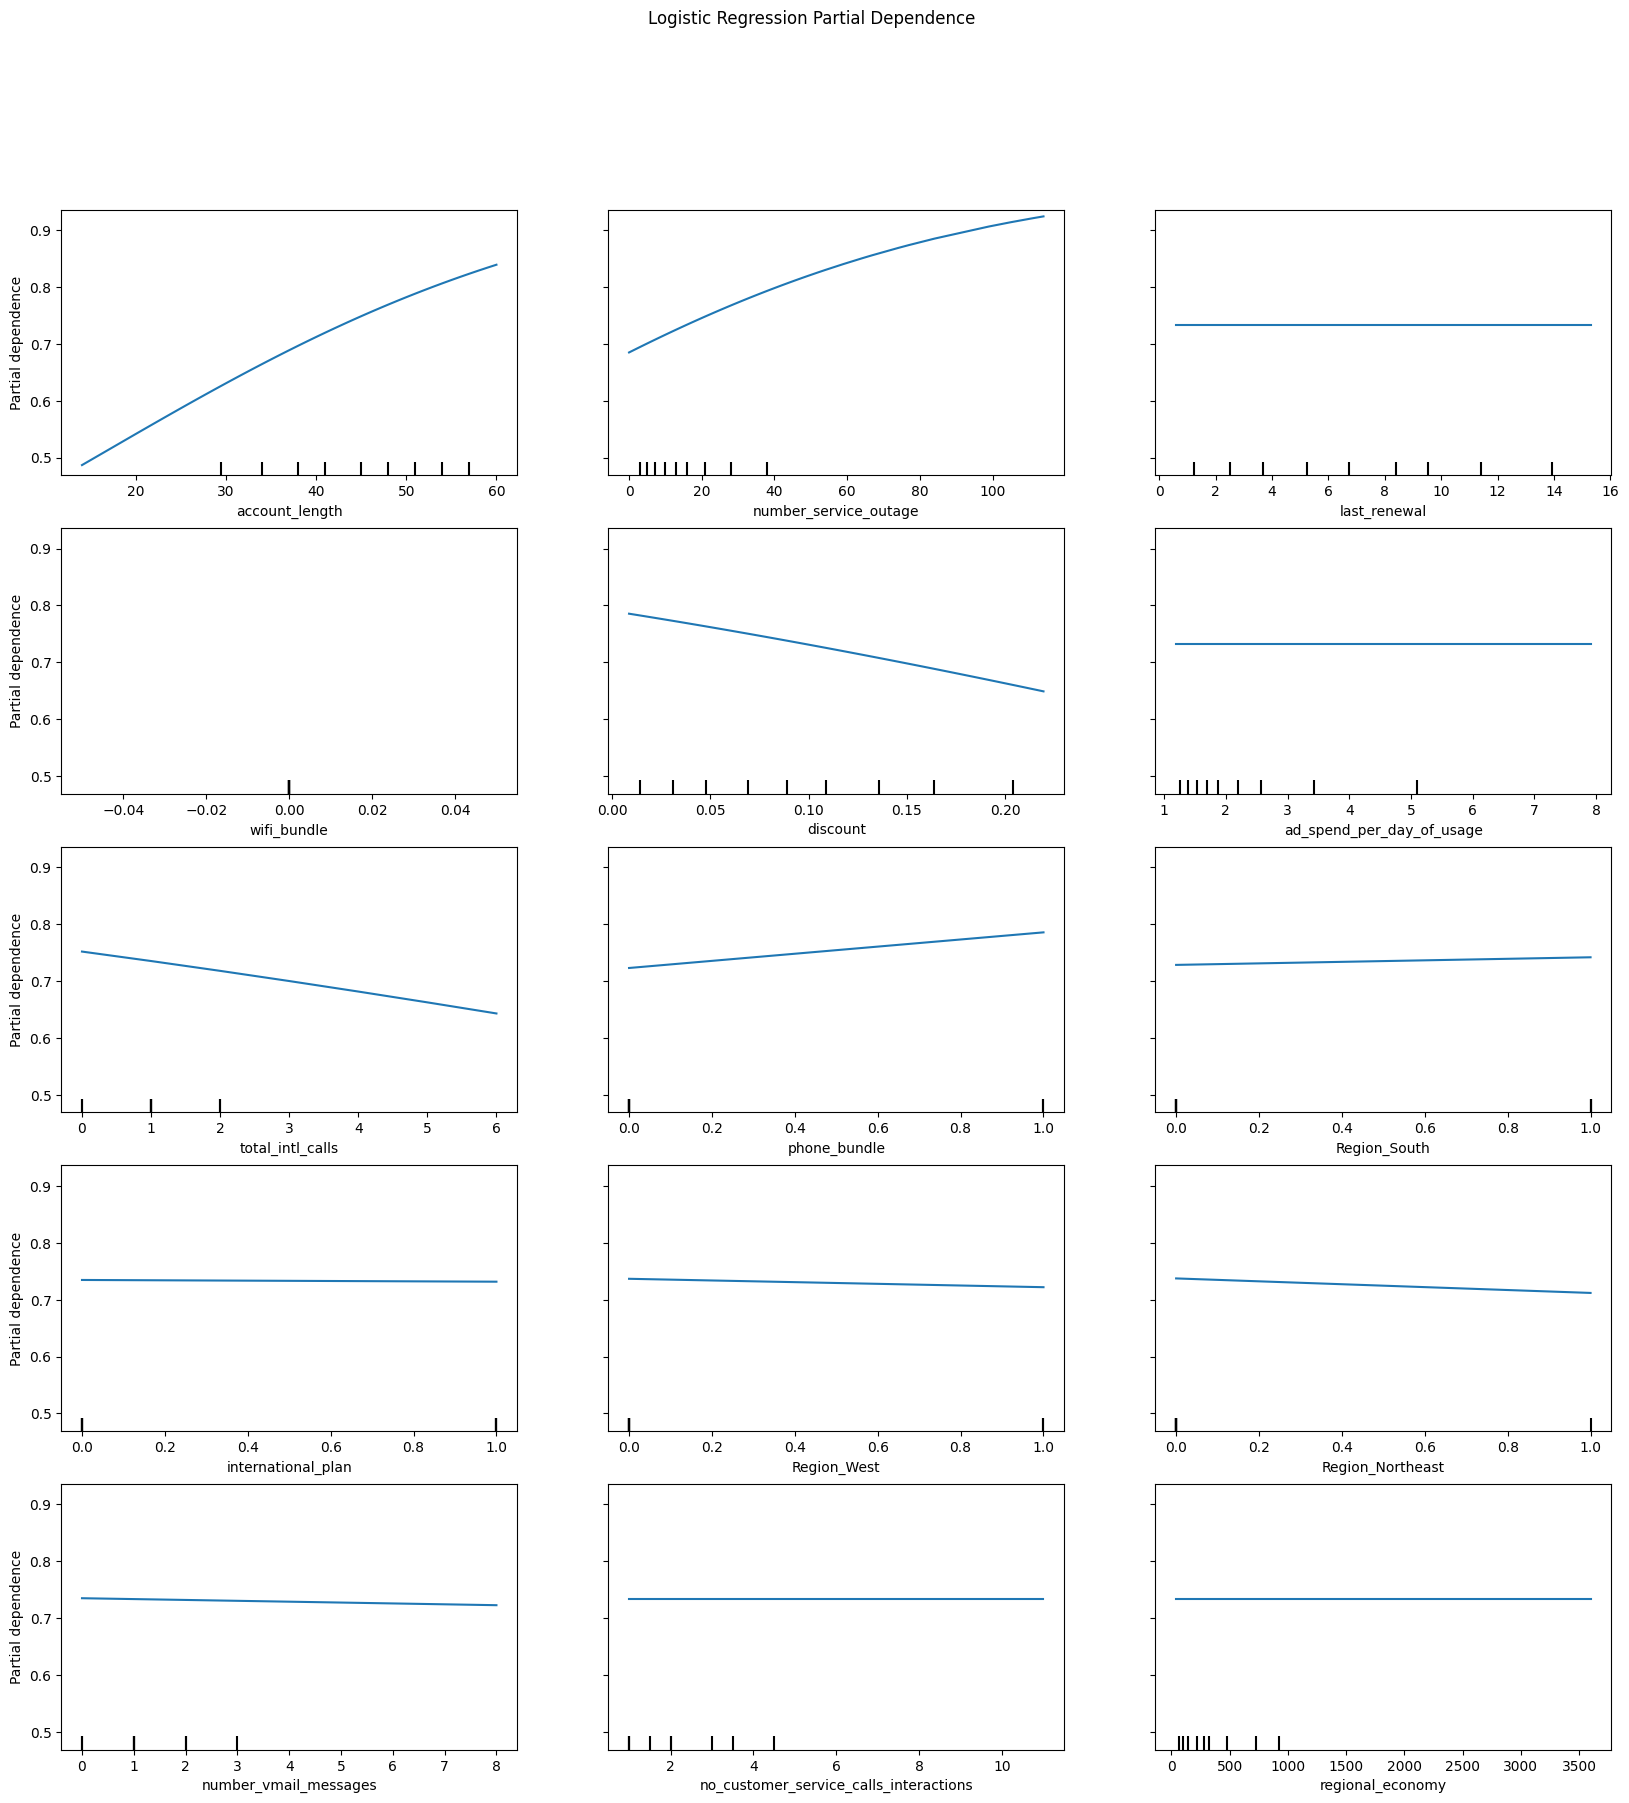

In [128]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Assuming best_model is your trained logistic regression model
# Assuming top_25_churners is your dataset

# Plot Partial Dependence for logistic regression
fig, ax = plt.subplots(figsize=(20, 20))
display = PartialDependenceDisplay.from_estimator(
    estimator=best_model,
    X=top_25_churners,
    features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    ax=ax
)
display.figure_.suptitle("Logistic Regression Partial Dependence")
plt.show()




**account_length**: The probability of churn increases as the account length increases. This could indicate customers growing dissatisfied over time or finding better alternatives.

**number_service_outage**: Increasing number of service outages leads to an increased probability of churn. This is intuitive as more outages likely decrease customer satisfaction.

**wifi_bundle**: As the wifi bundle coefficient increases, churn probability slightly decreases. This suggests that good wifi service could be a factor in customer retention.

**discount**: There is a downward trend in churn probability as the discount increases. Customers receiving discounts are less likely to churn, potentially because the perceived value or cost savings incentivize them to stay.

**last_renewal** and **ad_spend_per_day_of_usage** , **phone_bundle** The plot indicates a generally flat line, suggesting no significant impact of phone bundle variations on churn probability

we can say that for the top 25% churners the most significant variables to focus on are account_length and number_service_outage

# **2D plot**

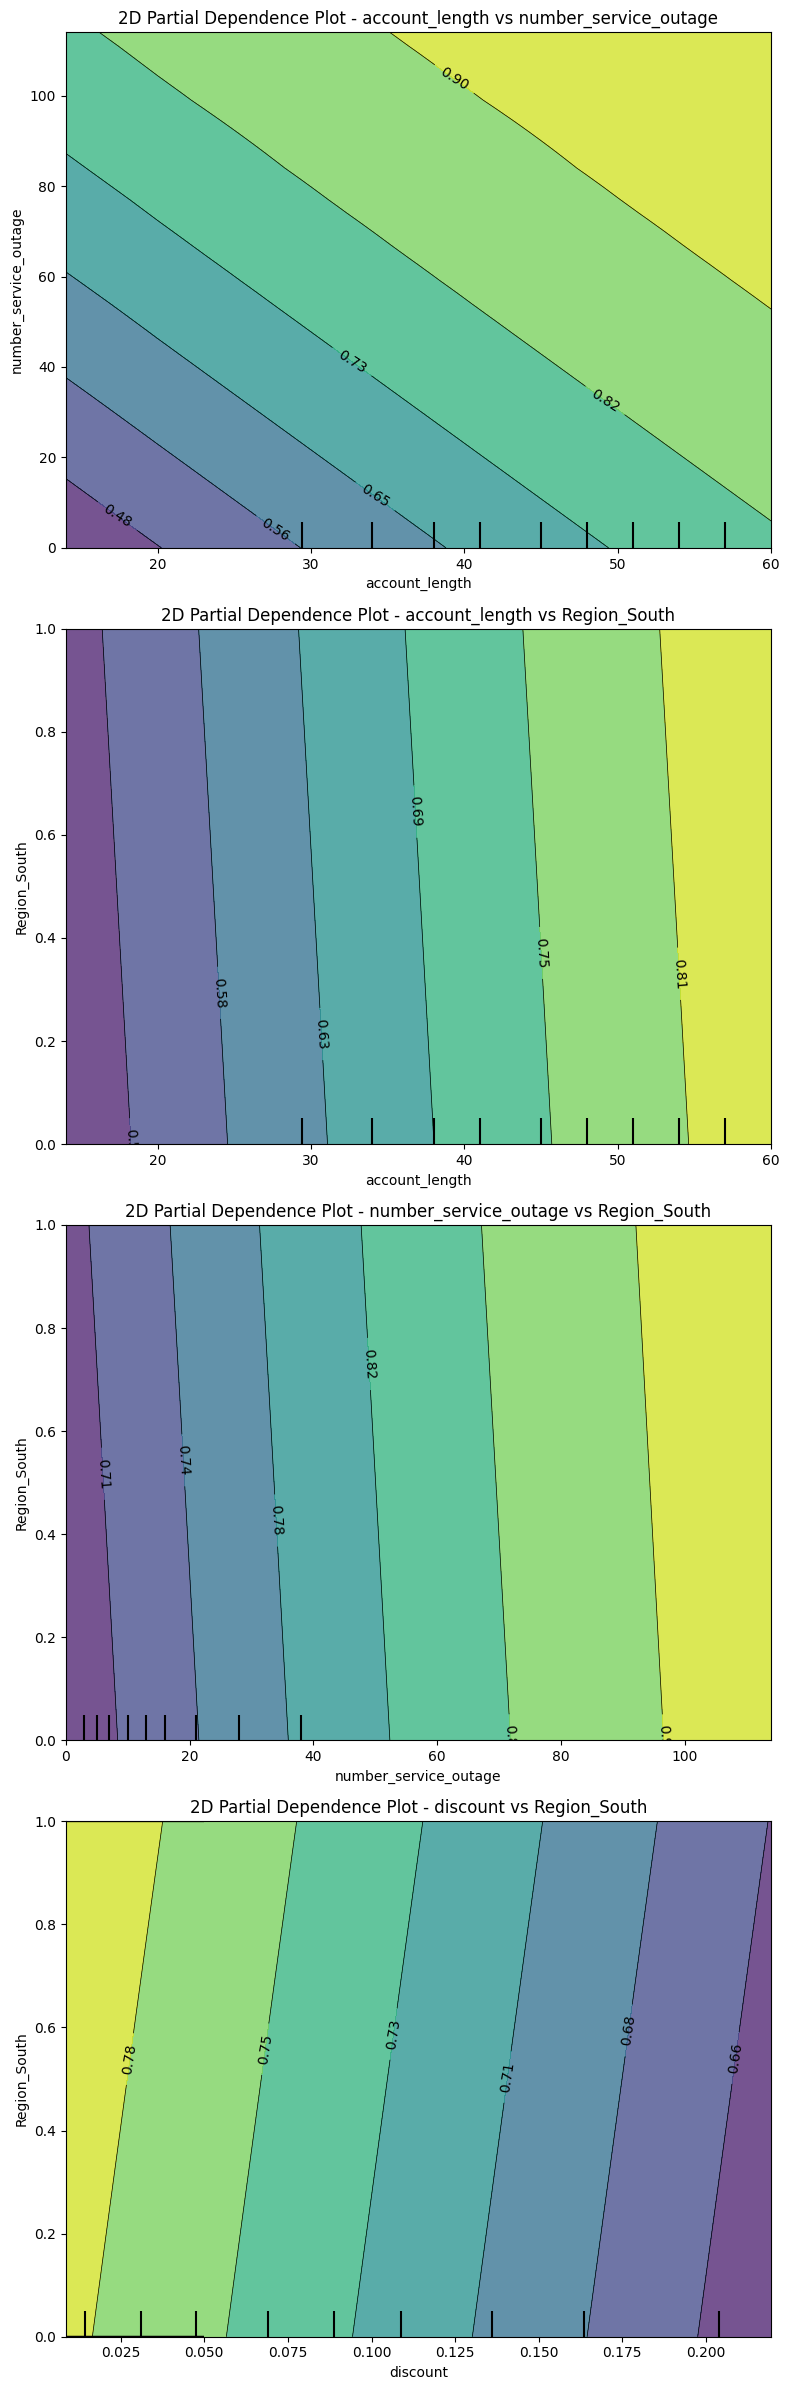

In [129]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Define the feature combinations for the 2D partial dependence plots
feature_combinations = [(0, 1), (0, 8), (1, 8), (4, 8)]  # Example feature indices

# Assume best_model, and feature_names are defined elsewhere in your code

# Plot the 2D partial dependence plots
fig, axs = plt.subplots(len(feature_combinations), figsize=(8, len(feature_combinations) * 6))

for i, feature_pair in enumerate(feature_combinations):
    disp = PartialDependenceDisplay.from_estimator(
        best_model,top_25_churners , features=[feature_pair], feature_names=feature_names, ax=axs[i]
    )
    axs[i].set_title(f'2D Partial Dependence Plot - {feature_names[feature_pair[0]]} vs {feature_names[feature_pair[1]]}')
    axs[i].set_xlabel(feature_names[feature_pair[0]])
    axs[i].set_ylabel(feature_names[feature_pair[1]])

if len(feature_combinations) == 1:
    axs = [axs]

plt.tight_layout()
plt.show()




1. **Account Length vs Number of Service Outages**:
   - The plot indicates an increasing trend of the predicted value as both account length and number of service outages increase. Higher values (towards yellow) suggest a greater likelihood of churn when both account length and number of outages are high, possibly due to accumulated frustration or unreliability over time.

2. **Account Length vs Region South**:
   - As account length increases, the predicted value increases across all values, indicating a higher likelihood of churn with longer account lengths. This trend appears to be somewhat consistent across the South region, with a slight decrease in the churn likelihood as the account length increases. The effect of being in the South region seems to moderate the impact of account length slightly, but it still trends towards higher churn with longer account tenures.

3. **Number of Service Outages vs Region South**:
   - This plot shows a relatively consistent impact across the number of service outages, with higher values associated with higher churn likelihood. Being in the South doesn't drastically change the impact of service outages on churn likelihood but does show a slight reduction in churn likelihood with fewer outages in this region.

4. **Discount vs Region South**:
   - The impact of discounts on churn likelihood varies inversely with the size of the discount. Higher discounts (moving from left to right on the discount axis) generally decrease the likelihood of churn. Being in the South seems to exacerbate this effect slightly, with the region showing a lower likelihood of churn at higher discount levels compared to other regions, especially at the highest discount levels.

outcomes :
- **Service quality** (as indicated by outages) consistently affects churn across regions.
- **Longer account durations** generally increase churn risk, possibly due to customer fatigue or competitive offers.
- **Discounts** are effective in reducing churn, with their effectiveness somewhat enhanced in certain regions like the South.
- **Regional differences** do affect churn predictions, with the South showing different trends compared to other regions in how discounts and service outages impact customer retention.

Such insights can be crucial for tailoring regional customer retention strategies and optimizing service and promotional offers to minimize customer churn.

# **SHAP**

In [131]:
import shap

explainer = shap.Explainer(logistic_reg, top_25_churners)
shap_values = explainer.shap_values(X_test)

# choosing an instance to explain
instance_idx = 16
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[instance_idx], feature_names=X_train.columns)

In [138]:
# Set up explainer for ".predict" method
explainer = shap.Explainer(best_model.predict, top_25_churners)

# Compute shap values
shap_values = explainer(X_train)

PermutationExplainer explainer: 501it [00:57,  7.73it/s]


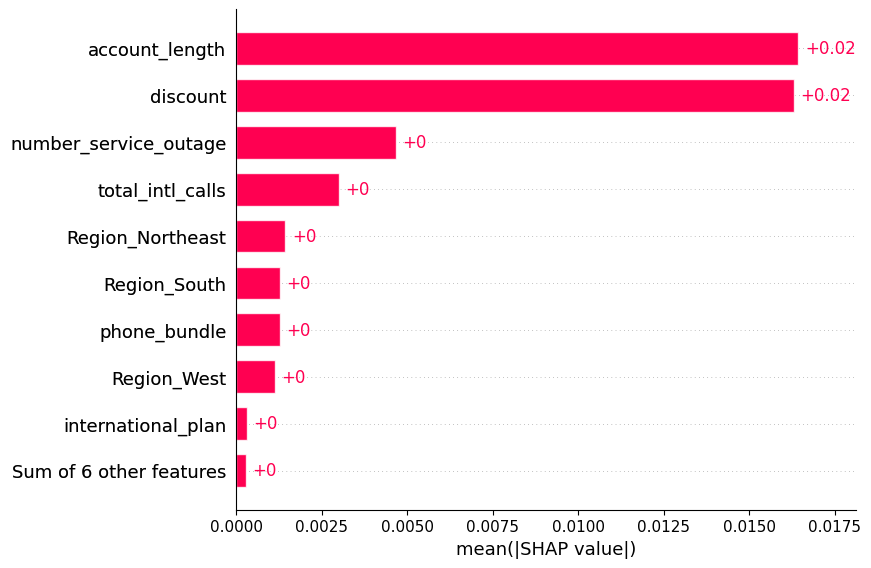

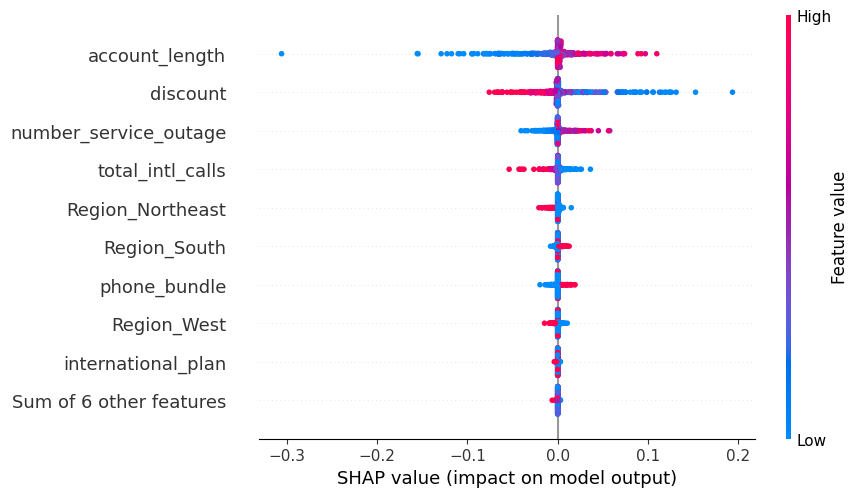

In [139]:
# Feature importance (global)

# Bar chart
shap.plots.bar(shap_values)

# Individual dots for each instance
shap.plots.beeswarm(shap_values)


**Featur Impact Direction and Magnitude**:

**Positive SHAP Values (Red)**: Features that push the model output higher, thus increasing the likelihood of churn.

**Negative SHAP Values (Blue)**: Features that push the model output lower, decreasing the likelihood of churn.
Top Influential Features:

**account_length**: High account lengths (shown in red) significantly increase the likelihood of churn. This might suggest longer-tenure customers are more prone to churn, possibly due to dissatisfaction accumulating over time or better offers from competitors.

**number_service_outage**: Frequent service outages (in red) have a strong positive effect on churn likelihood, indicating that reliability is crucial for customer retention.

**total_intl_calls**: This feature shows mixed effects, but more international calls generally decrease the likelihood of churn (blue). This might be due to these customers having a more "locked-in" feel with their current plans that accommodate their international calling needs.
Lesser Impact Features:

**Regions (Northeast, South, West)**: The plots show varied but generally lesser impact on churn likelihood. Regional factors might be overshadowed by service quality or individual account characteristics.

**discount, wifi_bundle**: These have lower magnitudes of impact but are generally beneficial in reducing churn (mostly shown in blue). Discounts and good wifi services seem to contribute positively to customer retention.

**phone_bundle**: Similarly to wifi, bundling phone services also appears to mostly decrease churn (blue), although the impact is less strong compared to discounts and wifi services.

**Features with No Clear Impact:**

**ad_spend_per_day_of_usage, last_renewal**: These features show very little impact on churn probability, suggesting that they are not decisive factors in the model or possibly that their effects are non-linear and not captured well by this linear model perspective.

SHAP is a powerful tool for understanding which features most influence customer decisions to stay or leave, highlighting potential areas for strategic improvements, such as enhancing service reliability and offering targeted discounts or bundled services to high-risk customer segments.

#**LIME**

In [141]:
explainer = lime.lime_tabular.LimeTabularExplainer(top_25_churners[top_15_features].values,
                                                   mode='classification',
                                                   training_labels=y_train.values,
                                                   feature_names=X_train.columns)

instance_idx = 5
exp = explainer.explain_instance(top_25_churners[top_15_features].iloc[instance_idx].values,
                                  best_model.predict_proba,
                                  num_features=len(X_train.columns))

exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



1. **Prediction Probabilities**:
   - The graphical display shows the prediction probabilities, where there is a 35% likelihood of the customer not churning (Class 0) and a 65% probability of churning (Class 1). This indicates that the model assesses this particular customer as more likely to churn based on the analyzed features.

2. **Feature Impact Visualization**:
   - This section uses SHAP values to visually represent how each feature influences the model’s decision-making process. The features contributing towards a higher likelihood of churn are represented in orange, and those contributing towards non-churn are in blue. For example, factors like phone bundle absence and a high number of service outages significantly push towards churn. Conversely, a substantial discount on the services provided mitigates the risk of churn. This visualization is key in understanding how individual factors weigh in on the model's outcome.

3. **Feature List and Values**:
   - The table on the right lists the features along with their respective values for the analyzed instance. It includes information such as discount rate, account length, region, number of service outages, and more. This section provides a quantitative breakdown of the features, showing which ones have the most significant impact on the prediction of churn. This aids in pinpointing specific aspects that could be addressed to potentially alter the churn outcome, such as improving service reliability or offering more competitive discounts.

Overall, this structured representation facilitates a deep understanding of the model’s predictive behavior on an individual level, highlighting key drivers of customer churn and offering insights that could guide strategic decisions to enhance customer retention.